In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_all = pd.read_csv("MRI_and_CDRinfo_Values_X_train.csv");
data_all.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,24,41,46,48,51,90,91,92,93,94,95,96,97,98,99,100,167,205,208,210,213,216,219,221,223,225,227,229,231,235,237,239,241,243,245,247,249,251,253,255,365,380,382,384,402,404,406,551,634,651,654,659,689,770,776,900,908,943,946,964,965,974,1176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,index_x,NACCID_x,NACCADC_x,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,...,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM,NACCNMRI_y,NACCVNUM_y,original_ind_y
0,1970,1970,116428,NACC831508,6518,I,1.0,5,23,2007,...,0.9674,9.7215,2.1089,5.2785,1.1998,0.3315,0.3810,1,1,5342
1,1146,1146,110463,NACC719761,6499,I,2.0,9,24,2010,...,1.5867,15.1130,2.1134,12.2880,1.8935,0.9070,1.8444,1,1,7855
2,675,675,106548,NACC979197,6061,F,2.0,7,18,2012,...,1.2816,14.1317,2.2958,6.9755,1.7738,0.7716,1.5066,3,3,1948


In [26]:
data_labels = pd.read_csv("CDR_Values_y_train.csv")
data_labels["HIP_VOL"] = data_all["HIPPOVOL"]
data_labels.head()

,Unnamed: 0,CDRGLOB,HIP_VOL
0,1970,0,5.196
1,1146,0,6.894
2,675,0,6.286
3,1268,2,5.589
4,2323,0,7.410


In [27]:
counted = (data_labels["CDRGLOB"]).value_counts().count() 
counted #Kolonda kaç adet CDRGLOB türünün olduğu

4

In [28]:
mylist = np.zeros((4, 2))
for i in range(counted):
  mylist[i,0] = data_labels[data_labels["CDRGLOB"]==i].iloc[:,2].mean()
  mylist[i,1] = data_labels[data_labels["CDRGLOB"]==i].iloc[:,2].std()
mylist = pd.DataFrame(data = mylist, columns=["MEAN","STD"])
mylist

,MEAN,STD
0,6.304869,0.757105
1,5.839063,0.866157
2,5.323365,0.974990
3,4.965071,1.031115


In [29]:
data_labels["THYROID"] = data_all["THYROID"]
data_labels["DIABETES"] = data_all["DIABETES"]
data_labels.head() #Hippocampus Volume ile hastalık olan troid ve diyabeti irdelemek istiyorum

,Unnamed: 0,CDRGLOB,HIP_VOL,THYROID,DIABETES
0,1970,0,5.196,1,1
1,1146,0,6.894,0,0
2,675,0,6.286,1,1
3,1268,2,5.589,0,0
4,2323,0,7.410,0,0


In [30]:
data_labels.pivot_table("HIP_VOL", index = ["THYROID", "DIABETES"], columns = "CDRGLOB")

CDRGLOB                  0         1         2         3
THYROID DIABETES                                        
-4      -4        6.087250  5.692075  6.167500  5.290000
 0       0        6.404199  5.866729  5.347116  5.004909
         1        6.156756  5.994913  5.580562  5.300357
         2        6.673400  7.129800  4.011100       NaN
         9        5.417867  5.649033  4.979133  4.609100
 1       0        6.055558  5.533200  5.075605  5.010017
         1        6.190024  5.640225  4.766780  4.608950
         2        6.641500  6.604800       NaN  3.928150
         9             NaN  5.343000       NaN       NaN
 2       0        6.476026  5.544767  5.034100  4.124900
         1        6.360725  6.445950  4.723600       NaN
         2        6.116500  6.084000  5.871600       NaN
 9       0        5.780650  5.049700       NaN       NaN
         9             NaN  5.855800       NaN       NaN

In [31]:
#Verinin az olması sebebiyle NaN gösteren diyabet ve tiroid değerlerini verimden atıyorum
for i in range(data_labels["CDRGLOB"].size):
  if (data_labels["THYROID"])[i] == 9 or (data_labels["DIABETES"])[i] ==9:
    data_labels = data_labels.drop(index = i)


In [32]:
data_labels.pivot_table("HIP_VOL", index = ["THYROID", "DIABETES"], columns = "CDRGLOB")

CDRGLOB                  0         1         2         3
THYROID DIABETES                                        
-4      -4        6.087250  5.692075  6.167500  5.290000
 0       0        6.404199  5.866729  5.347116  5.004909
         1        6.156756  5.994913  5.580562  5.300357
         2        6.673400  7.129800  4.011100       NaN
 1       0        6.055558  5.533200  5.075605  5.010017
         1        6.190024  5.640225  4.766780  4.608950
         2        6.641500  6.604800       NaN  3.928150
 2       0        6.476026  5.544767  5.034100  4.124900
         1        6.360725  6.445950  4.723600       NaN
         2        6.116500  6.084000  5.871600       NaN

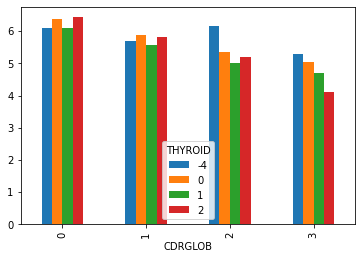

In [34]:
data_labels.pivot_table("HIP_VOL", columns="THYROID", index= "CDRGLOB").plot(kind="bar")

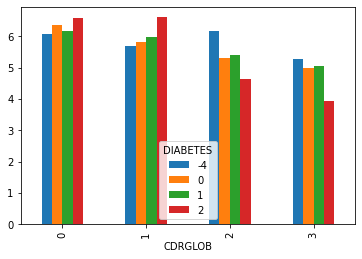

In [35]:
data_labels.pivot_table("HIP_VOL", columns="DIABETES", index= "CDRGLOB").plot(kind="bar")

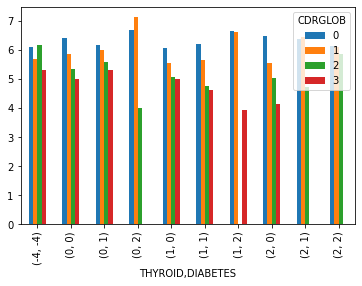

In [33]:
data_labels.pivot_table("HIP_VOL", index = ["THYROID", "DIABETES"], columns = "CDRGLOB").plot(kind="bar")